In [2]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Boston Housing Dataset

In [3]:
np.random.seed(1)

In [4]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = pd.read_csv('housing.csv', sep=r"\s+", header=None, names=cols)
df_boston.shape

(506, 14)

In [5]:
dummy = df_boston
dummy.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
X = dummy.drop('MEDV', axis=1)  # Remove the target column X
y = dummy['MEDV']

## Ridge

In [8]:
No_Trials = 100  # Number of Trials

all_training = pd.DataFrame()
all_test = pd.DataFrame()


for seedN in range(1, No_Trials, 1):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    
    # tuning parameters
    alpha_parameter = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2,
                       0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 10, 20, 50, 100]

    for alpha_run in alpha_parameter:
        # Define here wether Lasso or Ridge
        reg = Ridge(alpha=alpha_run, max_iter=1000000)
        reg.fit(X_train, y_train)  # build the model
        # record training set accuracy
        training_accuracy.append(reg.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(reg.score(X_test, y_test))
    all_training[seedN] = training_accuracy
    all_test[seedN] = test_accuracy

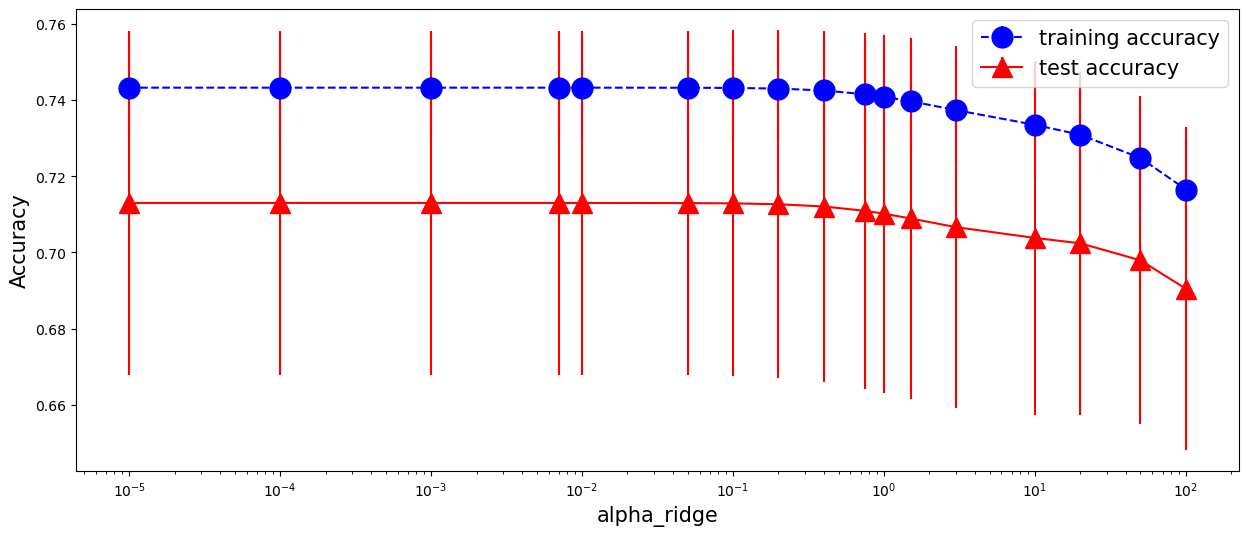

In [9]:
import pylab as plot
fig = plt.figure(figsize=(15, 6))
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(alpha_parameter, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy",
             color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(alpha_parameter, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy",
             color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("alpha_ridge", fontsize=15)
plt.legend()
plt.show()

In [10]:
print(f'best alpha: {alpha_parameter[all_test.mean(axis=1).argmax()]:.5f}')
print(f'highest accuracy: {all_test.mean(axis=1).max()*100:.4f}%')

best alpha: 0.00001
highest accuracy: 71.2986%


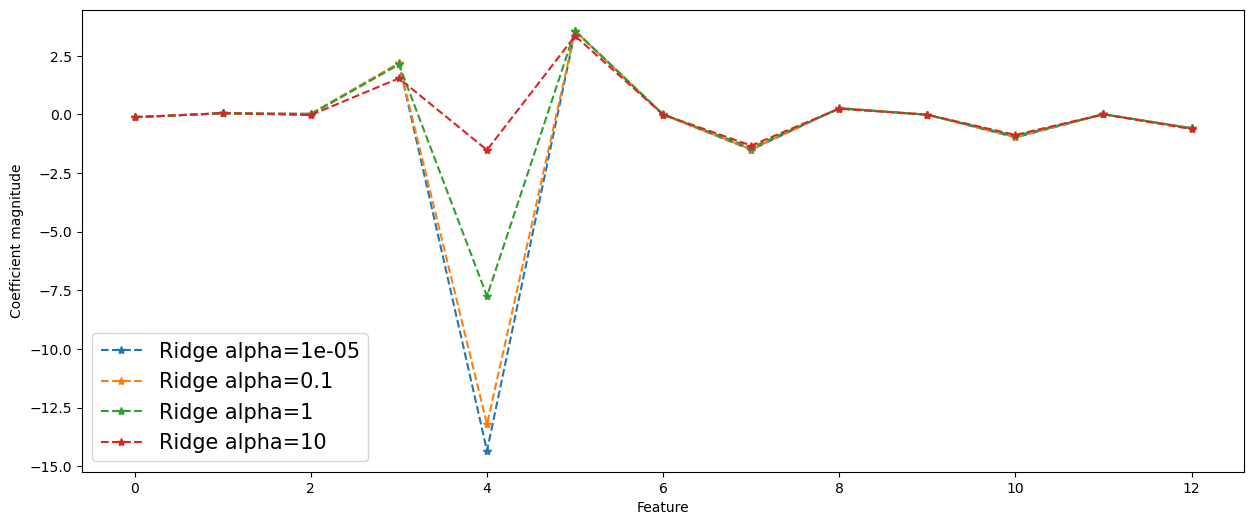

,parameter,weight of top predicor,top predictor
0,0.00001,14.337988,NOX
1,0.10000,13.212931,NOX
2,1.00000,7.746952,NOX
3,10.00000,3.349525,RM


In [11]:
param = [1e-5, 0.1, 1, 10]
fig = plt.figure(figsize=(15, 6))
coeff = []
for p in param:
    ridge = Ridge(alpha=p, max_iter=1000000).fit(X_train, y_train)
    plt.plot(ridge.coef_.T, '--*', label=f"Ridge alpha={p}")
    coeff.append([p, np.amax(np.abs(ridge.coef_.T)),
                 X.columns[np.argmax(np.abs((ridge.coef_.T)))]])

plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

plt.show()
display(pd.DataFrame(coeff, columns=[
        'parameter', 'weight of top predicor', 'top predictor']))

## Lasso

In [12]:
No_Trials = 100  # Number of Trials

all_training = pd.DataFrame()
all_test = pd.DataFrame()

for seedN in range(1, No_Trials, 1):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []

    # Tuning Parameters
    alpha_parameter = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1,
                       0.2, 0.4, 0.75, 1, 1.5, 3, 10, 20, 50]

    for alpha_run in alpha_parameter:
        # Define here wether Lasso or Ridge
        reg = Lasso(alpha=alpha_run, max_iter=1000000)
        reg.fit(X_train, y_train)  # build the model
        # record training set accuracy
        training_accuracy.append(reg.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(reg.score(X_test, y_test))
    all_training[seedN] = training_accuracy
    all_test[seedN] = test_accuracy

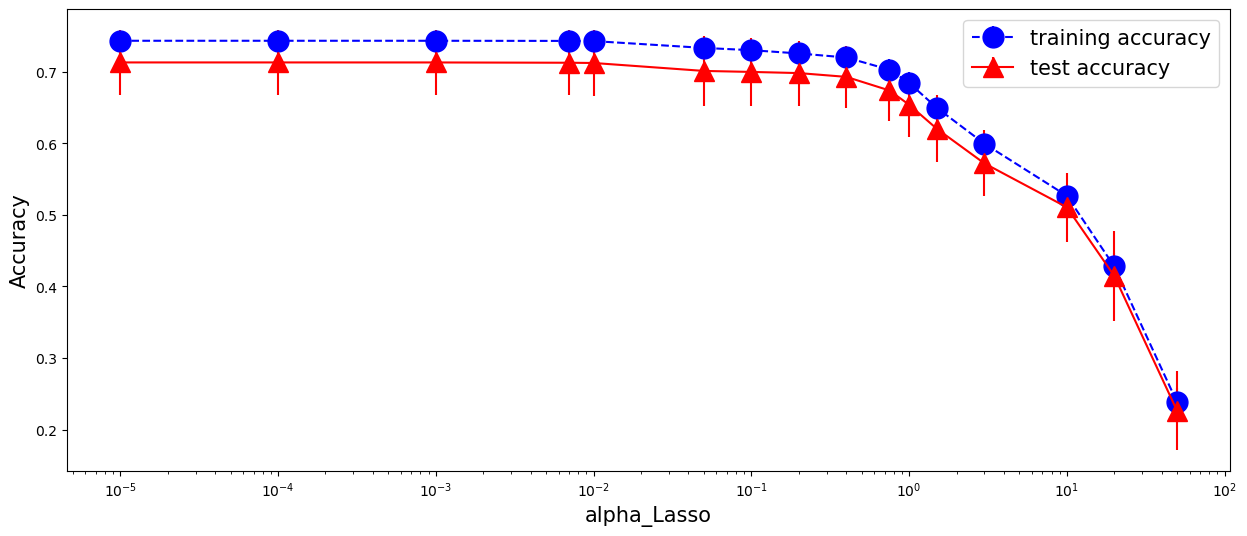

In [13]:
import pylab as plot
fig = plt.figure(figsize=(15, 6))
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(alpha_parameter, all_training.mean(axis=1),
             yerr=all_training.std(axis=1),
             label="training accuracy",
             color='blue',
             marker='o',
             linestyle='dashed',
             markersize=15)
plt.errorbar(alpha_parameter, all_test.mean(axis=1),
             yerr=all_test.std(axis=1),
             label="test accuracy",
             color='red',
             marker='^',
             linestyle='-',
             markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("alpha_Lasso", fontsize=15)
plt.legend()
plt.show()

In [14]:
print(f'best alpha: {alpha_parameter[all_test.mean(axis=1).argmax()]:.5f}')
print(f'highest accuracy: {all_test.mean(axis=1).max()*100:.4f}%')

best alpha: 0.00001
highest accuracy: 71.2985%


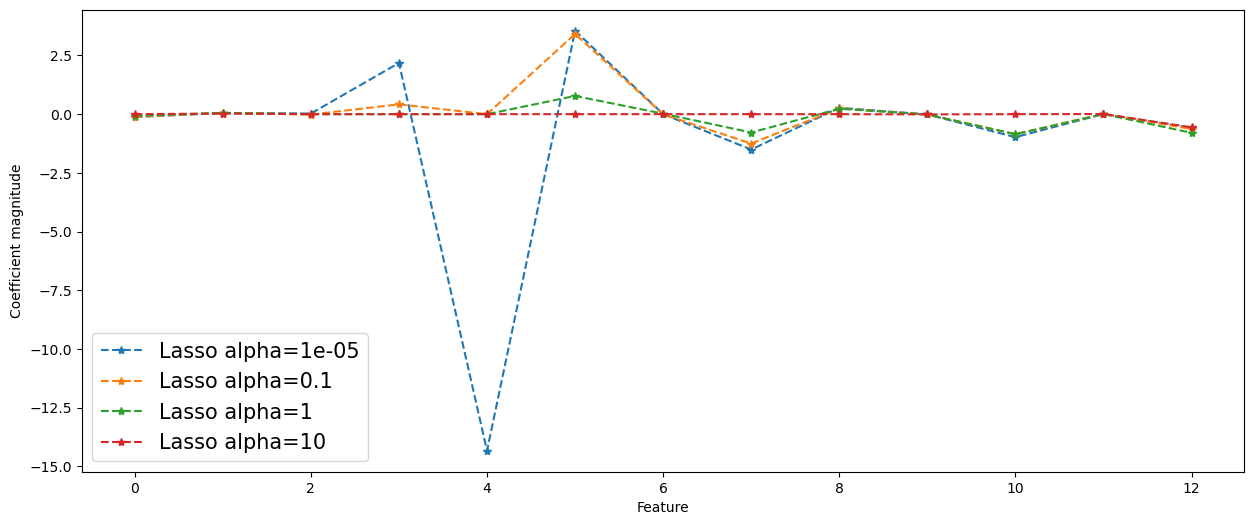

,parameter,weight of top predicor,top predictor
0,0.00001,14.334829,NOX
1,0.10000,3.415346,RM
2,1.00000,0.851492,PTRATIO
3,10.00000,0.558932,LSTAT


In [15]:
param = [1e-5, 0.1, 1, 10]
fig = plt.figure(figsize=(15, 6))
coeff = []
for p in param:
    lasso = Lasso(alpha=p, max_iter=1000000).fit(X_train, y_train)
    plt.plot(lasso.coef_.T, '--*', label=f"Lasso alpha={p}")
    coeff.append([p, np.amax(np.abs(lasso.coef_.T)),
                 X.columns[np.argmax(np.abs(lasso.coef_.T))]])

plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

plt.show()
display(pd.DataFrame(coeff, columns=[
        'parameter', 'weight of top predicor', 'top predictor']))

## Boston Housing Dataset Comments

Exploring various Lasso and Ridge models using a list of alpha values, we see that the highest performance is achiever at a value of <b> alpha = 0.00001, best accuracy = 71.30% </b> for both Ridge and Lasso regularization. We found that accuracy is best at a low alpha because the predicting magnitude of NOX is superior. By adding more weight to the punishing factor to regularize and give chance to other features, it adds noise to the feature that already had the best correlation with MEDV. In this regularization, it dampens the model to its own detriment, because it seems that none of the other features have strong correlations as a whole. Regularization is most effective when there are much more than 13 features, and the target is to reduce or punish 1 out of around 100 or 1000 features.

# Parkinsons Dataset

In [16]:
df_parkinsons = pd.read_excel(
    'parkinsons_updrs.xlsx', sheet_name="parkinsons_updrs")
df_parkinsons.shape

(5875, 22)

In [17]:
dummy = df_parkinsons
dummy.head(5)

,subject#,age,sex,test_time,motor_score,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,Target
0,1,72,0,5.6431,28.199,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,1,72,0,12.6660,28.447,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,1,72,0,19.6810,28.695,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,1,72,0,25.6470,28.905,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,1,72,0,33.6420,29.187,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [18]:
X = dummy.drop('Target', axis=1)  # Remove the target column X
y = dummy['Target']

## Ridge

In [19]:
No_Trials = 100  # Number of Trials

all_training = pd.DataFrame()
all_test = pd.DataFrame()


for seedN in range(1, No_Trials, 1):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []

    # Tuning Parameters
    alpha_parameter = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2,
                       0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 10, 20, 50, 100]

    for alpha_run in alpha_parameter:
        # Define here wether Lasso or Ridge
        reg = Ridge(alpha=alpha_run, max_iter=1000000)
        reg.fit(X_train, y_train)  # build the model
        # record training set accuracy
        training_accuracy.append(reg.score(X_train, y_train))
        # record generalization accuracy
        test_accuracy.append(reg.score(X_test, y_test))
    all_training[seedN] = training_accuracy
    all_test[seedN] = test_accuracy

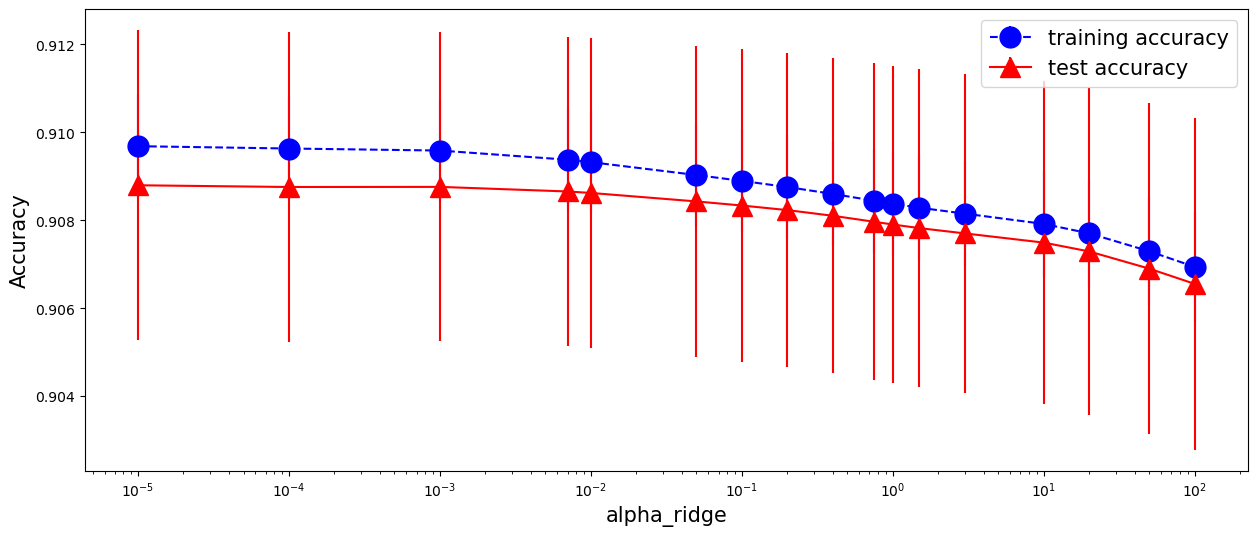

In [20]:
import pylab as plot
fig = plt.figure(figsize=(15, 6))
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(alpha_parameter, all_training.mean(axis=1),
             yerr=all_training.std(axis=1), label="training accuracy",
             color='blue', marker='o', linestyle='dashed', markersize=15)
plt.errorbar(alpha_parameter, all_test.mean(axis=1),
             yerr=all_test.std(axis=1), label="test accuracy",
             color='red', marker='^', linestyle='-', markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("alpha_ridge", fontsize=15)
plt.legend()
plt.show()

In [21]:
print(f'best alpha: {alpha_parameter[all_test.mean(axis=1).argmax()]:.5f}')
print(f'highest accuracy: {all_test.mean(axis=1).max()*100:.4f}%')

best alpha: 0.00001
highest accuracy: 90.8794%


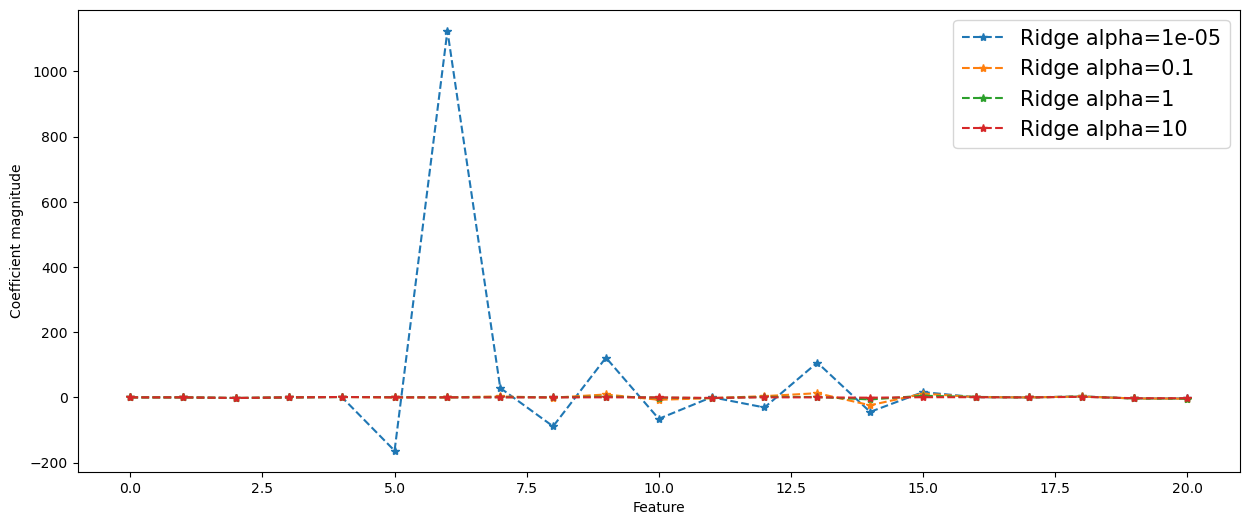

,parameter,weight of top predicor,top predictor
0,0.00001,1124.883494,Jitter(Abs)
1,0.10000,24.114160,Shimmer:APQ11
2,1.00000,6.397482,Shimmer:APQ11
3,10.00000,2.558968,PPE


In [22]:
param = [1e-5, 0.1, 1, 10]
fig = plt.figure(figsize=(15, 6))
coeff = []
for p in param:
    ridge = Ridge(alpha=p, max_iter=1000000).fit(X_train, y_train)
    plt.plot(ridge.coef_.T, '--*', label=f"Ridge alpha={p}")
    coeff.append([p, np.amax(np.abs(ridge.coef_.T)),
                 X.columns[np.argmax(np.abs(ridge.coef_.T))]])

plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

plt.show()
display(pd.DataFrame(coeff, columns=[
        'parameter', 'weight of top predicor', 'top predictor']))

## Lasso

In [23]:
No_Trials = 100

all_training = pd.DataFrame()
all_test = pd.DataFrame()

for seedN in range(1, No_Trials, 1):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []

    # Tuning Parameters
    alpha_parameter = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1,
                       0.2, 0.4, 0.75, 1, 1.5, 3, 10, 20, 50]

    for alpha_run in alpha_parameter:
        reg = Lasso(alpha=alpha_run, max_iter=1000000)
        reg.fit(X_train, y_train)
        training_accuracy.append(reg.score(X_train, y_train))
        test_accuracy.append(reg.score(X_test, y_test))
    all_training[seedN] = training_accuracy
    all_test[seedN] = test_accuracy

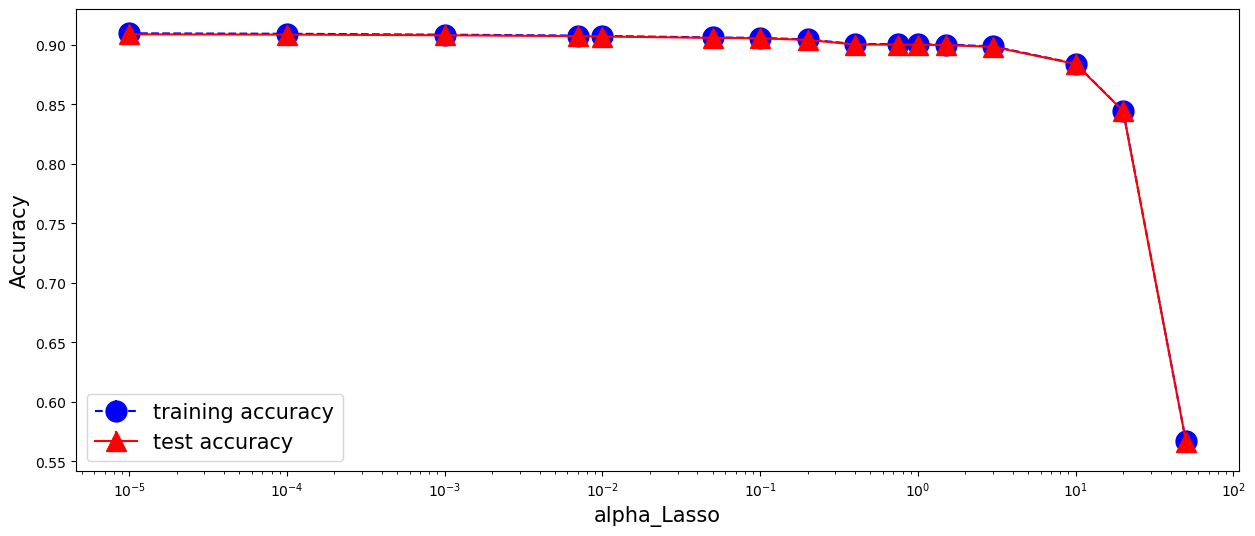

In [24]:
import pylab as plot
fig = plt.figure(figsize=(15, 6))
plt.xscale('log')
params = {'legend.fontsize': 15, 'legend.handlelength': 2}
plot.rcParams.update(params)

plt.errorbar(alpha_parameter, all_training.mean(axis=1),
             yerr=all_training.std(axis=1),
             label="training accuracy",
             color='blue',
             marker='o',
             linestyle='dashed',
             markersize=15)
plt.errorbar(alpha_parameter, all_test.mean(axis=1),
             yerr=all_test.std(axis=1),
             label="test accuracy",
             color='red',
             marker='^',
             linestyle='-',
             markersize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("alpha_Lasso", fontsize=15)
plt.legend()
plt.show()

In [25]:
print(f'best alpha: {alpha_parameter[all_test.mean(axis=1).argmax()]:.5f}')
print(f'highest accuracy: {all_test.mean(axis=1).max()*100:.4f}%')

best alpha: 0.00001
highest accuracy: 90.8760%


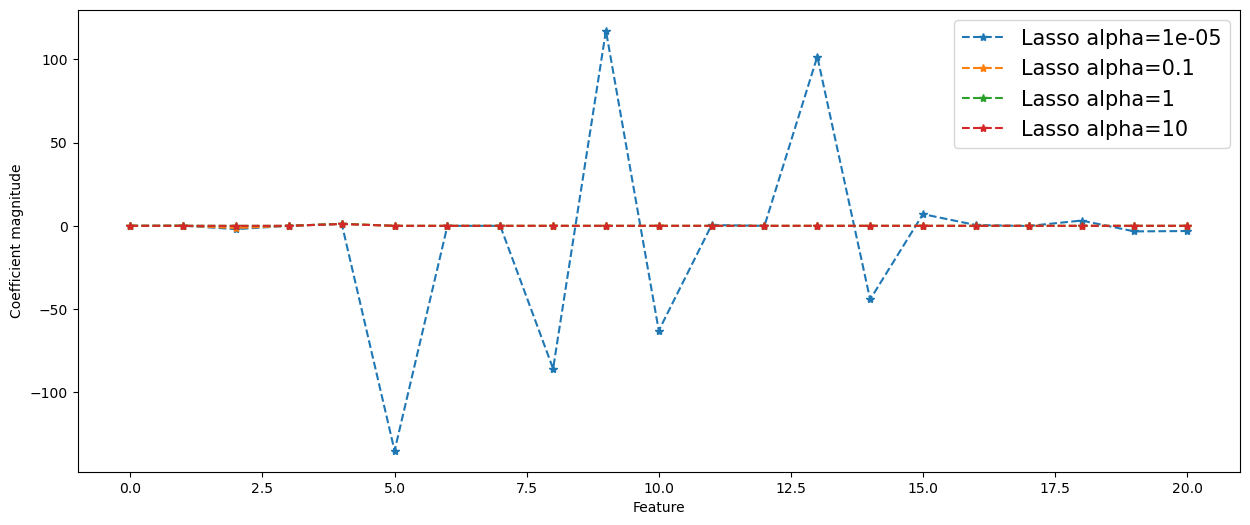

,parameter,weight of top predicor,top predictor
0,0.00001,134.960350,Jitter(%)
1,0.10000,1.312512,sex
2,1.00000,1.208434,motor_score
3,10.00000,1.093740,motor_score


In [26]:
param = [1e-5, 0.1, 1, 10]
fig = plt.figure(figsize=(15, 6))
coeff = []
for p in param:
    lasso = Lasso(alpha=p, max_iter=1000000).fit(X_train, y_train)
    plt.plot(lasso.coef_.T, '--*', label=f"Lasso alpha={p}")
    coeff.append([p, np.amax(np.abs(lasso.coef_.T)),
                 X.columns[np.argmax(np.abs(lasso.coef_.T))]])

plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

plt.show()
display(pd.DataFrame(coeff, columns=[
        'parameter', 'weight of top predicor', 'top predictor']))

## Parkinsons Dataset Comments

Exploring various Lasso and Ridge models using a list of alpha values, we see that the highest performance is achiever at a value of <b> alpha = 0.00001, best accuracy = 90.88% </b> for both Ridge and Lasso regularization. We found that accuracy is best at a low alpha because the predicting magnitude of a few features are superior. By adding more weight to the punishing factor to regularize and give chance to other features, it adds noise to what was already the strongest predictors, in this case Jitter(Abs) and Jitter(%) for ridge and lasso respectively.